<a href="https://colab.research.google.com/github/tugcegurbuz/Deep-Learning-with-TensorFlow/blob/master/5_CNNapplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:** Convolutional Neural Networks Application

Data set: MNIST that has a training set of 60,000 examples, and a test set of 10,000 examples.

Aim: Classify hand-written digits

Overview: The first Network is a simple Multi-layer Perceptron (MLP) and the second one is a Convolutional Neural Network (CNN).

---

In [37]:
import tensorflow as tf
tf.__version__

'1.14.0-rc1'

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#Explanation of one_hot = True is below

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The  *one-hot = True* argument only means that, in contrast to Binary representation, the labels will be presented in a way that to represent a number N, the $N^{th}$ bit is 1 while the the other bits are 0. For example, five and zero in a binary code would be:

<pre>
Number representation:    0
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       0       0       0 

Number representation:    5
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       1       0       1  
</pre>

Using a different notation, the same digits using one-hot vector representation can be show as: 
<pre>
Number representation:    0
One-hot encoding:        [5]   [4]    [3]    [2]    [1]   [0]  
Array/vector:             0     0      0      0      0     1   

Number representation:    5
One-hot encoding:        [5]   [4]    [3]    [2]    [1]    [0]  
Array/vector:             1     0      0      0      0      0   
</pre>

## 1) Using Simple Neural Network Model

In [39]:
#Create session
sess = tf.InteractiveSession()

#Instead of regular sessions in TF (which first sets up, then executes the
#session, then evaluates the tensors and then runs the operations), we can use
#interactive sessions in TF where you create your coding and run on the fly.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


It is best practice to define placeholders before defining the variables.

Now, we will define placeholders for input (Xs) and output (Ys).

Shapes:


*   X: First dimension is None because it can be any batch size. Second dimension is pixel size which is 28x28, 784 pixels. 
*   Y: First dimension is None because it can be any batch size. Second dimension is target size which is (0, 1, 2, 3 4, 5, 6, 7, 8, 9), 10 digit numbers. 



In [0]:
#Define Placeholders
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
#Create weights and biases

# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))

# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

In [0]:
#Initialize all variables

#Note: Since we are using interactive session, we need to use sess.run()
sess.run(tf.global_variables_initializer())

Our operation will be multiplying input matrix with weights matrix and adding them biases.

**Softmax** is an activation function that is normally used in classification problems. It generate the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have a larger probability than the other other digits.

For comparison, below is the one-hot vector for a nine digit label:

0 --> 0  
1 --> 0 

2 --> 0

3 --> 0

4 --> 0

5 --> 0

6 --> 0

7 --> 0

8 --> 0

9 --> 1

A machine does not have all this certainty, so we want to know what is the best guess, but we also want to understand how sure it was and what was the second better option. Below is an example of a hypothetical distribution for a nine digit:

0 -->0.01  
1 -->0.02  
2 -->0.03  
3 -->0.02  
4 -->0.12  
5 -->0.01  
6 -->0.03

7 -->0.06

8 -->0.1

9 -->0.6  

 
**Note:Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution.**


In [0]:
#Define the operation
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [0]:
#Minimize the difference between right answers and estimated outputs by the NN

#Cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), 
                                              reduction_indices=[1]))

In [0]:
#Optimize your cost function with gradient descent

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [0]:
#Train batches

#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [47]:
#Test

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100

print("The final accuracy for the simple NN model is: {} % ".format(acc) )

The final accuracy for the simple NN model is: 90.21000266075134 % 


In [0]:
#Finish the session

sess.close()

## 2) Using Deep Learning Model

Architecture of our network is:

  * Form the Model

    - (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
    - (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
      - (ReLU 1)  -> [?, 28, 28, 32]
      - (Max pooling 1) -> [?, 14, 14, 32]
    - (Convolutional layer 2)  -> [?, 14, 14, 64] 
      - (ReLU 2)  -> [?, 14, 14, 64] 
      - (Max pooling 2)  -> [?, 7, 7, 64] 
    - [fully connected layer 3] -> [1x1024]
      - [ReLU 3]  -> [1x1024]
    - [Drop out]  -> [1x1024]
    - [fully connected layer 4] -> [1x10]

  * Training

  * Testing

In [49]:
#Close previous sessions
sess.close()

#Start interactive session
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
#Create general parameters for the model

width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [0]:
#Define placeholders
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

In [52]:
#Convert images of dataset into tensors

#Our images are 28x28 pixels, 1 channel (grayscale).
#Second input of the function is defined: [Batch number, width, height, image channels]
#Since batchnumber of the image can be any size, we set it as -1.

x_image= tf.reshape(x, [-1, 28, 28, 1])

x_image

<tf.Tensor 'Reshape_2:0' shape=(?, 28, 28, 1) dtype=float32>

##Form The Model

###Convolutional Layer 1

We need 32 feature maps here (32 different filters are applied on each image). 

So, the output of this layer will be 28x28x32

In [0]:
#Define kernel weights and biases

#Kernel: 5x5, 1 channel (grayscale)
#In this step, we create a filter / kernel tensor of shape 
#[filter_height, filter_width, in_channels, out_channels]

W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))

b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) #need 32 biases for 32 outputs


**Inputs:**

* tensor of shape [batch, in_height, in_width, in_channels]. x of shape [batch_size,28 ,28, 1]
* a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5, 5, 1, 32]
* stride which is [1, 1, 1, 1]. The convolutional layer, slides the "kernel window" across the input tensor. As the input tensor has 4 dimensions: [batch, height, width, channels], then the convolution operates on a 2D window on the height and width dimensions. strides determines how much the window shifts by in each of the dimensions. As the first and last dimensions are related to batch and channels, we set the stride to 1. But for second and third dimension, we could set other values, e.g. [1, 2, 2, 1]


**Process:**

* Change the filter to a 2-D matrix with shape [5 * 5 * 1,32]
* Extracts image patches from the input tensor to form a virtual tensor of shape [batch, 28, 28, 5 * 5 * 1].
* For each batch, right-multiplies the filter matrix and the image vector.

**Output:**

* A Tensor (a 2-D convolution) of size tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)
* Notice: the output of the first convolution layer is 32 [28x28] images. Here 32 is considered as volume/depth of the output image.

In [54]:
#Convolve with weight tensor and add biases
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

convolve1

<tf.Tensor 'add_7:0' shape=(?, 28, 28, 32) dtype=float32>

In this step, we just go through all outputs convolution layer, convolve1, and wherever a negative number occurs, we swap it out for a 0. It is called ReLU activation Function.

In [55]:
#Apply ReLu Activation Function
h_conv1 = tf.nn.relu(convolve1)

h_conv1

<tf.Tensor 'Relu_5:0' shape=(?, 28, 28, 32) dtype=float32>

**Max pooling** is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region.

Here, we will use 2x2 window matrix

**Strides:** dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matrix of size 28x28x32, and the output would be a matrix of size 14x14x32.

In [56]:
#Apply max pooling
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool_2:0' shape=(?, 14, 14, 32) dtype=float32>

###Convolutional Layer 2

We apply the convolution again in this layer. Lets look at the second layer kernel:

* Filter/kernel: 5x5 (25 pixels)
* Input channels: 32 (from the 1st Conv layer, we had 32 feature maps)
* 64 output feature maps

**Notice:** here, the input image is [14x14x32], the filter is [5x5x32], we use 64 filters of size [5x5x32], and the output of the convolutional layer would be 64 convolved image, [14x14x64].

**Notice:** the convolution result of applying a filter of size [5x5x32] on image of size [14x14x32] is an image of size [14x14x1], that is, the convolution is functioning on volume.

In [0]:
#Define weights and biases

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))#need 64 biases for 64 outputs

In [58]:
#Convolve image with weight tensor and add biases
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2

convolve2

<tf.Tensor 'add_8:0' shape=(?, 14, 14, 64) dtype=float32>

In [59]:
#Apply ReLu activation function
h_conv2 = tf.nn.relu(convolve2)

h_conv2

<tf.Tensor 'Relu_6:0' shape=(?, 14, 14, 64) dtype=float32>

In [60]:
#Apply max pooling
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2

conv2

<tf.Tensor 'MaxPool_3:0' shape=(?, 7, 7, 64) dtype=float32>

### Fully Connected Layer

Now, we need a fully connected latyer to use Softmax and create probabilities at the end.

It takes high-level filtered iamges from previous layer and convert them into a flat array.

So, it will take 64 matrices (7x7) and converteach them into 49x1 arrays. Then all 64 arrays will be connected and make an array of the size 3136x1.

Then,  we will connect it into another layes of size 1024x1. So, the weight between these 2 layers will be 3136x1024

In [61]:
#Flatten second layer
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64])

layer2_matrix

<tf.Tensor 'Reshape_3:0' shape=(?, 3136) dtype=float32>

In [0]:
# Define weights and biases

W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1)) 
#last layer (7x7) is multiplied by the number of feature maps (64)
#and creates 1024 outputs for softmax layer

b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [0]:
#Multiply weights and layer2 matrix and add biases
fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1

In [64]:
#Apply ReLu activation function
h_fc1 = tf.nn.relu(fcl)

h_fc1

<tf.Tensor 'Relu_7:0' shape=(?, 1024) dtype=float32>

###Drop-out Layer

This is the optional layer for reducing the overfitting. Here, networks forget some features. 

At each training step in a mini-batch, some units get switched off randomly so that it will not interact with the network. That is, if weights cannot be updated, nor affect the learning of the other network nodes. This can be very useful for very large neural networks to prevent overfitting.

In [75]:
#Define a placeholder
keep_prob = tf.placeholder(tf.float32)

#Drop
layer_drop = tf.nn.dropout(h_fc1, keep_prob)


layer_drop

<tf.Tensor 'dropout_3/mul_1:0' shape=(?, 1024) dtype=float32>

### Read-out Layer (Softmax Layer)

It is a kind of fully connected layer.

It is the last layer of our CNN. It takes high-level filtered images and translate them into probabilities by using Softmax. 

Input channels: 1024 (neurons from 3rd layer)

Output features: 10 digits

In [0]:
#Define weights and biases

W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits

In [0]:
#Multiply weights with dropped layer and add biases

fc=tf.matmul(layer_drop, W_fc2) + b_fc2

In [78]:
#Apply softmax
y_CNN= tf.nn.softmax(fc)

y_CNN
#y_CNN is the tensor of probabilities

<tf.Tensor 'Softmax_4:0' shape=(?, 10) dtype=float32>

##Train The Model

In [0]:
#Define loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

In [0]:
#Define optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
#Define how many of the cases in a mini-batch has been classified correctly
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

In [82]:
#Define accuracy (average correct cases in percentage)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy

<tf.Tensor 'Mean_8:0' shape=() dtype=float32>

In [0]:
#Run the session
sess.run(tf.global_variables_initializer())

In [84]:
#Training
for i in range(1100):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.06
step 100, training accuracy 0.8
step 200, training accuracy 0.92
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.94
step 900, training accuracy 0.94
step 1000, training accuracy 0.94


##Test The Model

In [85]:
# evaluate in batches to avoid out-of-memory issues
n_batches = mnist.test.images.shape[0] // 50
cumulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
print("test accuracy {}".format(cumulative_accuracy / n_batches))

test accuracy 0.9681999999284744


So, as seen, accuracy is higher when we use Deep Learning approach.

## Visualization

Let's see the kernels

In [0]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

--2019-06-23 17:44:35--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2019-06-23 17:44:36 (415 MB/s) - ‘utils1.py’ saved [5097/5097]



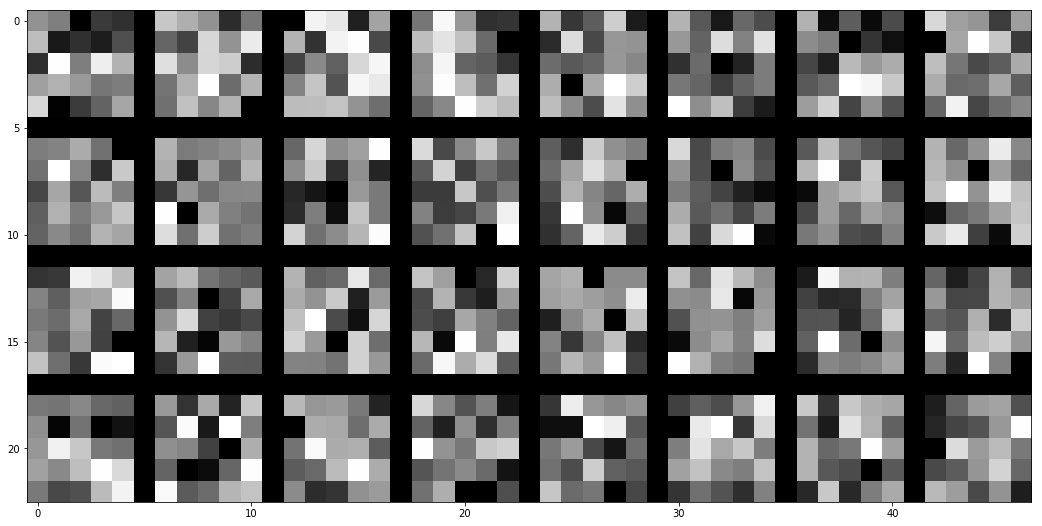

In [87]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
from PIL import Image

%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))

#Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Let's see one sample image from mnist

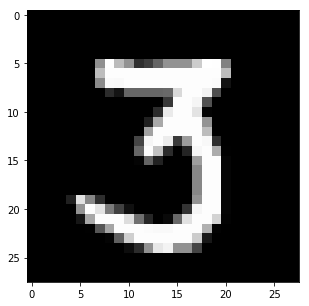

In [88]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

Let's see the each filter that is applied at Layer 1

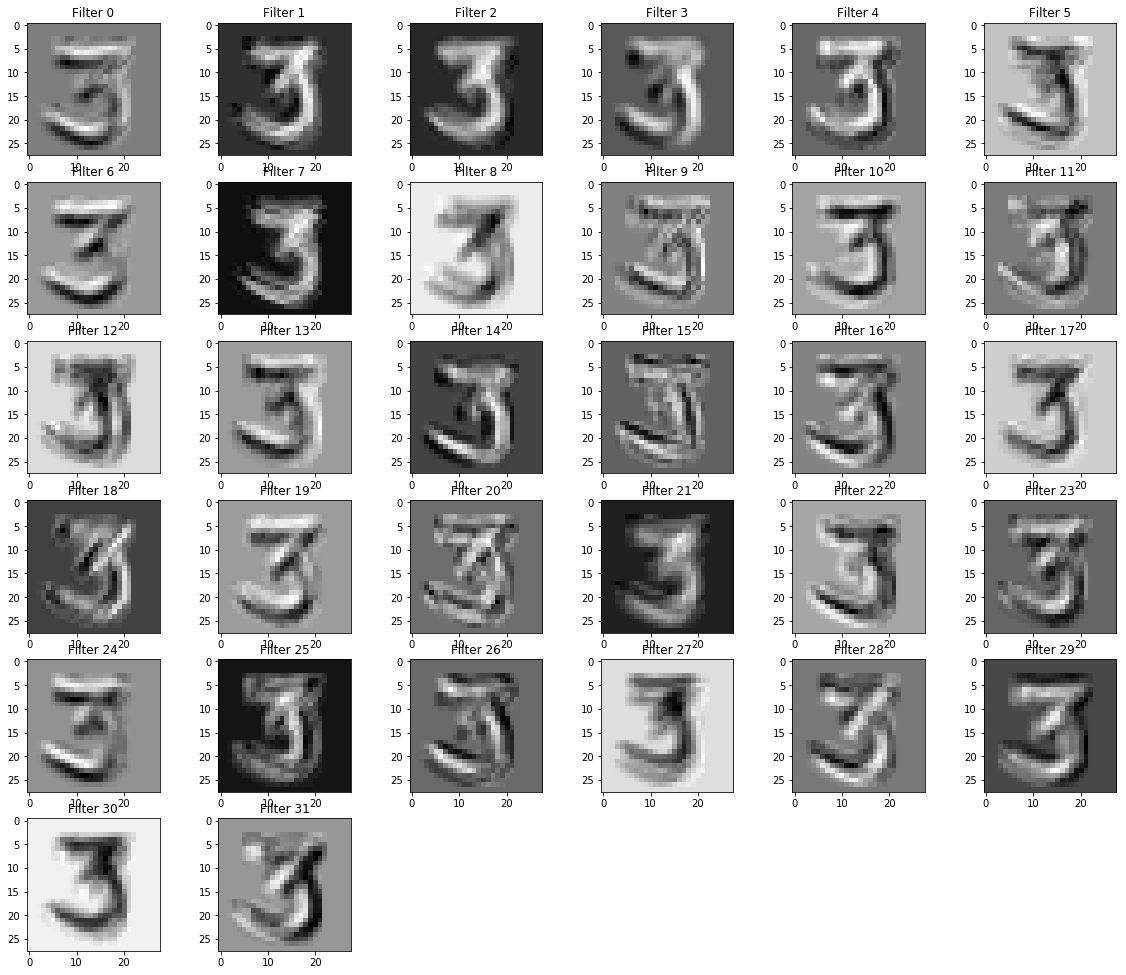

In [89]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

Let's see the each filter that is applied at Layer 2

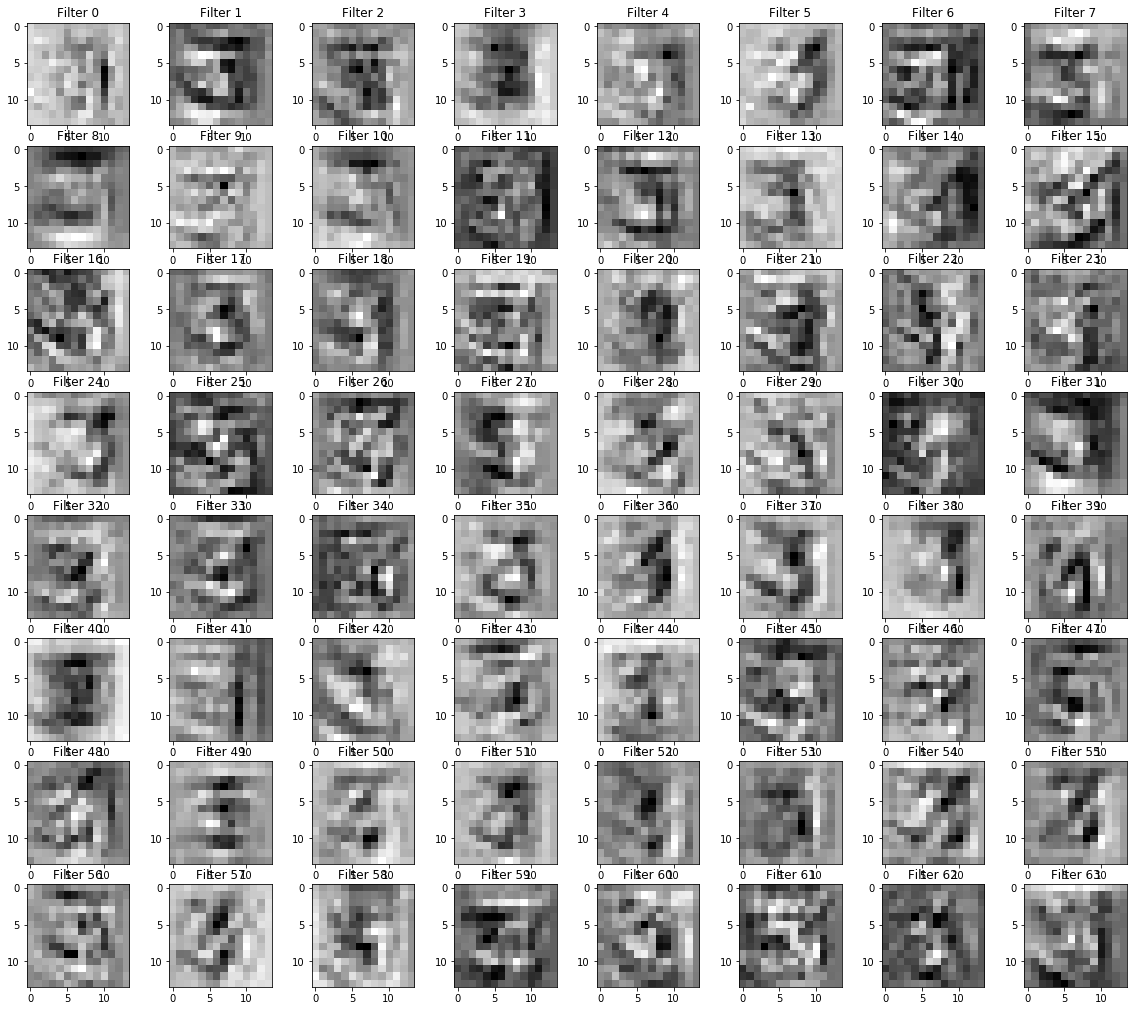

In [90]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
sess.close() #finish the session